In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import multiprocessing
import os
from torch import autograd
from fastai.transforms import TfmType
from fasterai.transforms import *
from fastai.conv_learner import *
from fasterai.images import *
from fasterai.dataset import *
from fasterai.visualize import *
from fasterai.callbacks import *
from fasterai.loss import *
from fasterai.modules import *
from fasterai.training import *
from fasterai.generators import *
from fasterai.filters import *
from fastai.torch_imports import *
from pathlib import Path
from itertools import repeat
import tensorboardX
plt.style.use('dark_background')
torch.backends.cudnn.benchmark=True
torch.cuda.set_device(0)

In [3]:
#IMAGENET = Path('data/imagenet/ILSVRC/Data/CLS-LOC/train')
#colorizer_path = IMAGENET.parent/('colorize_gen_192.h5')
colorizer_path = 'colorize_gen_192.h5'
#colorizer_path = IMAGENET.parent/('colorize18_gen_160.h5')
#defader_path = IMAGENET.parent/('bwdefade3_gen_160.h5')

#The higher the render_factor, the more GPU memory will be used and generally images will look better.  
#11GB can take a factor of 42 max.  Performance generally gracefully degrades with lower factors, 
#though you may also find that certain images will actually render better at lower numbers.  
#This tends to be the case with the oldest photos.
render_factor=25

In [4]:
filters = [Colorizer34(gpu=0, weights_path=colorizer_path,nf_factor=2, map_to_orig=True)]
#filters = [DeFader(gpu=3, weights_path=defader_path, nf_factor=2), Colorizer34(gpu=0, weights_path=colorizer_path,nf_factor=2, map_to_orig=True)]
vis = ModelImageVisualizer(filters, render_factor=render_factor, results_dir='result_images')

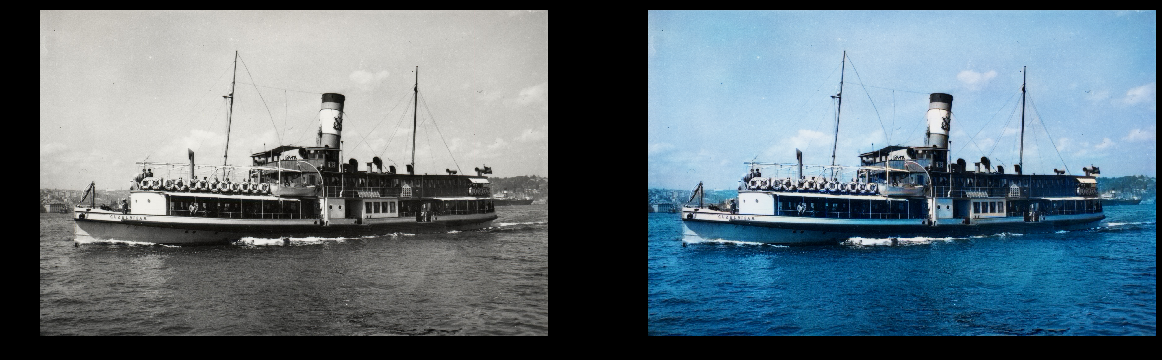

In [5]:
vis.plot_transformed_image("c.jpg")